In [89]:
# The code was removed by Watson Studio for sharing.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
# The code was removed by Watson Studio for sharing.

In [6]:
from pixiedust.display import *

Pixiedust database opened successfully


In [7]:
train_identity = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('train_identity.csv', 'default-donotdelete-pr-l16zufkrkht8vm'))

In [8]:
train_transaction = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('train_transaction.csv', 'default-donotdelete-pr-l16zufkrkht8vm'))

In [9]:
train_identity.createOrReplaceTempView("train_identity")
train_transaction.createOrReplaceTempView("train_transaction")

## Checking Training Set

In [8]:
display(train_identity)

TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,None,None,0.0,0.0,100.0,NotFound,52.0,None,Found,Found,121.0,None,410.0,142.0,None,None,None,None,None,None,None,Found,Found,None,chrome 62.0,None,None,None,F,F,T,T,desktop,Windows
2987100,0.0,264818.0,None,None,0.0,0.0,None,None,None,None,100.0,NotFound,None,-300.0,New,NotFound,166.0,None,215.0,533.0,None,None,None,None,None,None,None,New,NotFound,Android 7.0,chrome 62.0 for android,32.0,1920x1080,match_status:2,T,F,T,T,mobile,SM-G930V Build/NRD90M
2987689,-5.0,22446.0,None,None,0.0,0.0,None,None,None,None,100.0,NotFound,52.0,-300.0,New,NotFound,166.0,13.0,542.0,600.0,None,None,None,None,None,None,None,New,NotFound,Windows 10,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
2987748,0.0,19026.0,0.0,0.0,0.0,0.0,None,None,0.0,0.0,100.0,NotFound,None,-300.0,Found,Found,166.0,None,529.0,256.0,None,None,None,None,None,None,None,Found,Found,Mac OS X 10_10_5,safari generic,24.0,2560x1600,match_status:2,T,F,T,T,desktop,MacOS
2987791,-10.0,405379.0,0.0,0.0,3.0,0.0,None,None,0.0,0.0,100.0,NotFound,52.0,None,Found,Found,225.0,None,254.0,507.0,None,None,None,None,None,None,None,Found,Found,None,firefox 57.0,None,None,None,F,F,T,T,desktop,None


In [9]:
display(train_transaction)

TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
2987084,0,87928,125.674,C,5583,103.0,185.0,visa,226.0,credit,None,None,None,744.0,anonymous.com,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,None,None,0.0,None,0.0,None,None,None,0.0,None,0.0,0.0,0.0,0.0,None,None,None,M0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2987109,0,88346,107.95,W,2704,111.0,150.0,mastercard,117.0,debit,299.0,87.0,4.0,None,gmail.com,None,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,41.0,41.0,40.0,40.0,40.0,None,None,None,None,40.0,40.0,None,None,None,40.0,T,T,F,None,None,F,F,F,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.

## Joining transaction and identity

In [10]:
columns = train_identity.columns[1:]
queryCols = ''
for col in columns:
    queryCols += ', b.'+col
queryCols

', b.id_01, b.id_02, b.id_03, b.id_04, b.id_05, b.id_06, b.id_07, b.id_08, b.id_09, b.id_10, b.id_11, b.id_12, b.id_13, b.id_14, b.id_15, b.id_16, b.id_17, b.id_18, b.id_19, b.id_20, b.id_21, b.id_22, b.id_23, b.id_24, b.id_25, b.id_26, b.id_27, b.id_28, b.id_29, b.id_30, b.id_31, b.id_32, b.id_33, b.id_34, b.id_35, b.id_36, b.id_37, b.id_38, b.DeviceType, b.DeviceInfo'

In [11]:
query = f"""
SELECT 
    a.* {queryCols} 
    FROM train_transaction a
    LEFT JOIN train_identity b
    ON a.transactionID = b.transactionID
"""

transaction_identity = sql(query)
transaction_identity.createOrReplaceTempView("transaction_identity")

In [12]:
train_transaction.count()

590540

In [13]:
train_identity.count()

144233

In [14]:
transaction_identity.count()

590540

### Data Quality

#### Uniqueness of transaction ID

In [16]:
query = """
SELECT COUNT(*), COUNT(DISTINCT(transactionID))
FROM train_identity
"""

sql(query).show()

+--------+-----------------------------+
|count(1)|count(DISTINCT transactionID)|
+--------+-----------------------------+
|  144233|                       144233|
+--------+-----------------------------+



In [17]:
query = """
SELECT COUNT(*), COUNT(DISTINCT(transactionID))
FROM train_transaction
"""

sql(query).show()

+--------+-----------------------------+
|count(1)|count(DISTINCT transactionID)|
+--------+-----------------------------+
|  590540|                       590540|
+--------+-----------------------------+



In [18]:
query = """
SELECT COUNT(*), COUNT(DISTINCT(transactionID))
FROM transaction_identity
"""

sql(query).show()

+--------+-----------------------------+
|count(1)|count(DISTINCT transactionID)|
+--------+-----------------------------+
|  590540|                       590540|
+--------+-----------------------------+



#### Missing Values

In [12]:
from pyspark.sql.functions import col, sum

In [19]:
# train identity

nulls = train_identity.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in train_identity.columns))
nulls_pd = nulls.toPandas().transpose()

In [20]:
num_trans = train_identity.count()
nulls_pd.columns = ['counts']
nulls_pd["prop"] = nulls_pd.counts / num_trans
nulls_pd.sort_values(by="prop", ascending=False)

,counts,prop
id_24,139486,0.967088
id_25,139101,0.964419
id_07,139078,0.964259
id_08,139078,0.964259
id_21,139074,0.964231
id_26,139070,0.964204
id_23,139064,0.964162
id_27,139064,0.964162
id_22,139064,0.964162
id_18,99120,0.687221


In [21]:
nulls = train_transaction.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in train_transaction.columns))
nulls_pd = nulls.toPandas().transpose()

num_trans = train_transaction.count()
nulls_pd.columns = ['counts']
nulls_pd["prop"] = nulls_pd.counts / num_trans
nulls_pd.sort_values(by="prop", ascending=False)

,counts,prop
dist2,552913,0.936284
D7,551623,0.934099
D13,528588,0.895093
D14,528353,0.894695
D12,525823,0.890410
D6,517353,0.876068
D9,515614,0.873123
D8,515614,0.873123
V153,508595,0.861237
V139,508595,0.861237


In [13]:
nulls = transaction_identity.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in transaction_identity.columns))
nulls_pd = nulls.toPandas().transpose()

num_trans = transaction_identity.count()
nulls_pd.columns = ['counts']
nulls_pd["prop"] = nulls_pd.counts / num_trans
nulls_pd.sort_values(by="prop", ascending=False)

,counts,prop
id_24,585793,0.991962
id_25,585408,0.991310
id_07,585385,0.991271
id_08,585385,0.991271
id_21,585381,0.991264
id_26,585377,0.991257
id_27,585371,0.991247
id_23,585371,0.991247
id_22,585371,0.991247
dist2,552913,0.936284


In [14]:
# We select columns with <90% null values
df2 = nulls_pd[nulls_pd.prop < 0.90].sort_values(by="prop", ascending=False)
df2.head()

,counts,prop
D13,528588,0.895093
D14,528353,0.894695
D12,525823,0.890410
id_04,524216,0.887689
id_03,524216,0.887689


In [15]:
retain_cols = list(df2.index)
retain_cols[:5]
cols_query = retain_cols[0]
for col in retain_cols[1:]:
    cols_query += ', '+col

In [16]:
# Select only the columns with <90% null
query = f"""
SELECT
    {cols_query}
FROM transaction_identity
"""

transaction_id2 = sql(query)
transaction_id2.createOrReplaceTempView("transaction_id2")
# display(transaction_id2)

In [17]:
# get categorical and numerical columns
cat = ['id_33', 'id_30', 'id_34', 'DeviceInfo', 'id_16', 
       'P_emaildomain', 'R_emaildomain', 'id_31', 'DeviceType', 
       'id_29', 'id_28', 'id_38', 'id_35', 'id_37', 'id_15',
      'id_36', 'card4', 'card6', 'ProductCD', 'id_12'] 
num = [c for c in transaction_id2.columns if c not in cat]


In [18]:
query_cat = cat[0]

for c in cat[1:]:
    query_cat += ', ' + c
    
query_num = num[0]

for c in num[1:]:
    query_num += ', ' + c

In [19]:
# categorical only
query = f"""
SELECT {query_cat}
FROM transaction_id2
"""

transaction_id_cat = sql(query)
transaction_id_cat.createOrReplaceGlobalTempView("transaction_id_cat")
# display(transaction_id_cat)

In [20]:
# numerical only
query = f"""
SELECT {query_num}
FROM transaction_id2
"""

transaction_id_num = sql(query)
transaction_id_num.createOrReplaceGlobalTempView("transaction_id_num")
# display(transaction_id_num)

In [21]:
numcat = num + cat
types = ['float' for i in range(len(num))] + ['string' for i in range(len(cat))]
numcat_types = list(zip(numcat, types))
print(numcat_types[:5])
print(numcat_types[-5:])

[('D13', 'float'), ('D14', 'float'), ('D12', 'float'), ('id_04', 'float'), ('id_03', 'float')]
[('id_36', 'string'), ('card4', 'string'), ('card6', 'string'), ('ProductCD', 'string'), ('id_12', 'string')]


In [22]:
# converting numbers from string to float

transaction_id3 = transaction_id2.select(*(transaction_id2[col].cast(types).alias(col)
                        for col, types in numcat_types))
# display(transaction_id3)

In [23]:
from pyspark.sql.functions import col, sum

# replace all null values with 0
transaction_id4 = transaction_id3.fillna(value=0)

nulls = transaction_id4.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in transaction_id4.columns))
nulls_pd = nulls.toPandas().transpose()

num_trans = transaction_id4.count()
nulls_pd.columns = ['counts']
nulls_pd["prop"] = nulls_pd.counts / num_trans
nulls_pd.sort_values(by="prop", ascending=False)

,counts,prop
id_33,517251,0.875895
id_30,512975,0.868654
id_34,512735,0.868248
DeviceInfo,471874,0.799055
id_16,461200,0.780980
R_emaildomain,453249,0.767516
id_31,450258,0.762451
DeviceType,449730,0.761557
id_28,449562,0.761273
id_29,449562,0.761273


In [24]:
transaction_id4.createOrReplaceTempView("transaction_id4")

#### Value Distribution

In [25]:
# numerical only
query = f"""
SELECT {query_num}
FROM transaction_id4
"""

transaction_id4_num = sql(query)
transaction_id4_num.createOrReplaceTempView("transaction_id4_num")

In [30]:
# min, max, mean, standard deviation per numerical column
stats = transaction_id4_num.describe()

In [ ]:
display(stats)

summary,D13,D14,D12,id_04,id_03,D6,D9,D8,id_09,id_10,id_32,id_14,V153,V161,V162,V163,V138,V157,V156,V155,V154,V139,V149,V158,V147,V146,V142,V141,V140,V148,V152,V151,V150,V145,V144,V143,V159,V160,V165,V164,V166,V322,V332,V339,V338,V337,V336,V335,V334,V333,V331,V323,V329,V328,V327,V326,V325,V324,V330,id_13,V231,V252,V244,V246,V247,V248,V249,V253,V242,V254,V257,V258,V218,V261,V262,V263,V243,V241,V265,V240,V237,V236,V235,V233,V232,V230,V229,V228,V226,V225,V224,V223,V217,V264,V260,V266,V273,V267,V278,V277,V276,V275,V274,V219,V268,V269,id_05,id_06,id_20,id_19,id_17,V177,V213,V179,V178,V176,V214,V173,V172,V168,V215,V216,V167,V212,V202,V181,V203,V211,V207,V183,V186,V187,V206,V191,V196,V205,V204,V193,V199,V192,V182,V190,V188,V174,V184,V189,V180,V194,V195,V197,V198,V200,V201,V175,V185,V170,V208,V209,V210,V169,V171,id_02,id_11,V220,V239,V234,V222,V227,V272,V271,V270,V259,V256,V255,V251,V250,V245,V221,V238,id_01,dist1,M5,M7,M9,M8,D5,M4,D2,D11,V11,V6,V2,V10,V9,V8,V7,V5,V1,V4,V3,M3,M2,M1,D3,M6,V43,V50,V49,V48,V47,V46,V45,V44,V39,V42,V40,V35,V36,V52,V37,V38,V41,V51,D4,V85,V93,V92,V91,V90,V89,V88,V87,V86,V84,V83,V81,V80,V79,V78,V77,V76,V75,V94,V82,D15,V74,V72,V70,V69,V68,V67,V66,V65,V64,V63,V62,V61,V60,V59,V58,V57,V56,V55,V54,V53,V73,V71,V18,V22,V34,V31,V32,V17,V28,V27,V26,V25,V24,V23,V33,V21,V12,V16,V30,V15,V14,V29,V13,V19,V20,D10,addr2,addr1,card2,card5,card3,V314,V315,V301,V300,V296,V289,V288,V283,V282,V281,D1,V313,V124,V125,V113,V118,V130,V97,V96,V95,V126,V115,V116,V117,V119,V98,V120,V121,V129,V128,V127,V114,V122,V123,V131,V99,V134,V100,V137,V136,V135,V110,V109,V108,V107,V133,V112,V106,V105,V104,V103,V102,V101,V132,V111,V320,V321,V316,V319,V291,V298,V297,V295,V294,V293,V292,V290,V318,V287,V286,V285,V284,V280,V279,V299,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V317,card1,TransactionAmt,TransactionDT,isFraud,C12,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C14,C13,TransactionID
count,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,5

In [26]:
sums = transaction_id4_num.select(*(sum(col(c)) for c in transaction_id4_num.columns))

In [27]:
sums_pd = sums.toPandas()
sums_pd.columns = transaction_id4_num.columns

In [28]:
# we remove some columns that have 0 values
to_remove = list(sums_pd.T[sums_pd.T.values == 0].index)
to_retain = [c for c in transaction_id4_num.columns if c not in to_remove]

query_retain = to_retain[0]

for c in to_retain[1:]:
    query_retain += ', ' + c

In [29]:
# numerical only
query = f"""
SELECT {query_retain}
FROM transaction_id4_num
"""

transaction_id4_num2 = sql(query)
transaction_id4_num2.createOrReplaceGlobalTempView("transaction_id4_num2")

In [30]:
# we remove some columns that have 0 values
to_retain = [c for c in transaction_id4.columns if c not in to_remove]

query_retain = to_retain[0]

for c in to_retain[1:]:
    query_retain += ', ' + c

In [31]:
# numerical and categorical retained only
query = f"""
SELECT {query_retain}
FROM transaction_id4
"""

transaction_id5 = sql(query)
transaction_id5.createOrReplaceGlobalTempView("transaction_id5")
# display(transaction_id5)

In [52]:
# # save to CSV
# transaction_id5.write.csv("transaction_id_train.csv" )

In [49]:
# save file
# Save dataframe as csv file to storage
# project.save_data(data=transaction_id5.toPandas().to_csv(index=False), file_name='transaction_id_train.csv',overwrite=True)
# project.save_data(data=transaction_id5.write.csv(), file_name='transaction_id_train.csv',overwrite=True)

In [78]:
# # save 
# fileNameOut = 'swift://'+ credentials_1['container'] + '.spark/transaction_id_train.csv' 
# transaction_id5.write.format('com.databricks.spark.csv').options(header='true').save(fileNameOut)

In [93]:
spark = SparkSession.builder.getOrCreate()
spark.catalog.listDatabases()

[Database(name='default', description='Default Hive database', locationUri='file:/home/spark/shared/spark-warehouse')]

In [99]:
# transaction_id5.write.format("csv").save("/home/spark/shared/spark-warehouse/transaction_id_train.csv")

### Feature Quality (Correlation Matrix)

In [32]:
from pyspark.mllib.stat import Statistics

In [38]:
col_names = transaction_id4_num2.columns
features = transaction_id4_num2.rdd.map(lambda row: row[0:])
corr_mat=Statistics.corr(features, method="pearson")

In [39]:
target_ind = np.where(np.array(transaction_id4_num2.columns)=='isFraud')[0][0]

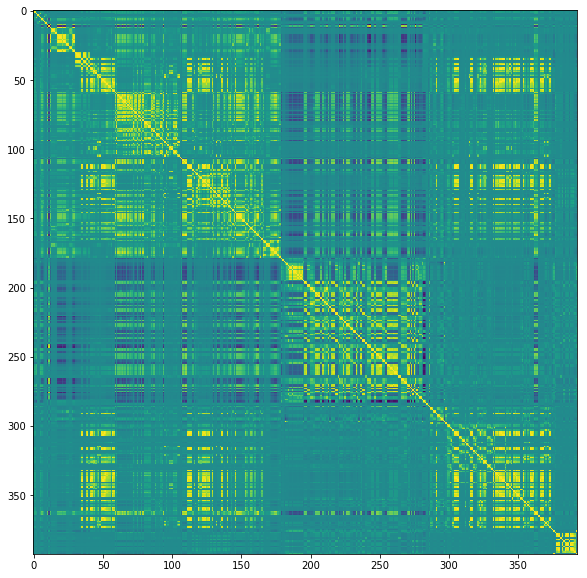

In [40]:
plt.figure(figsize=(10, 10))
plt.imshow(corr_mat)

In [41]:
corr_with_target = pd.DataFrame(corr_mat)
corr_with_target.columns = transaction_id4_num2.columns
corr_with_target.index = transaction_id4_num2.columns
corr_with_target = corr_with_target[['isFraud']]
corr_with_target = corr_with_target.sort_values(by='isFraud', ascending=False)
corr_with_target = corr_with_target.dropna()

In [42]:
corr_with_target.head(10)

,isFraud
isFraud,1.000000
V257,0.281349
V201,0.268686
V246,0.266292
V200,0.262079
V244,0.246454
V189,0.245846
V242,0.241799
V258,0.239206
V188,0.237794


In [43]:
corr_with_target.tail(10)

,isFraud
V48,-0.091582
V30,-0.098517
V91,-0.098592
V70,-0.099106
V69,-0.102396
V90,-0.102635
V29,-0.102738
addr1,-0.106814
id_01,-0.144516
addr2,-0.161030


Text(0, 0.5, 'feature')

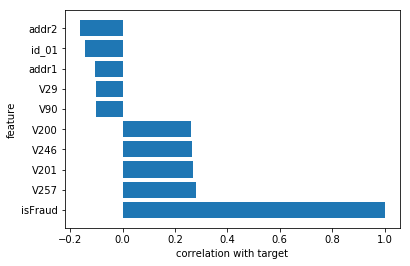

In [44]:
x1 = list(corr_with_target.index)[:5]
y1 = list(corr_with_target.isFraud)[:5]

x2 = list(corr_with_target.index)[-5:]
y2 = list(corr_with_target.isFraud)[-5:]

x = x1 + x2
y = y1 + y2


plt.barh(x, y)
plt.xlabel('correlation with target')
plt.ylabel('feature')